# Week 13: Supervised Learning Homework

### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

Descriptions of columns available here:

* https://new.data.calcofi.org/index.php/database/calcofi-database/bottle-field-descriptions

* https://new.data.calcofi.org/index.php/database/calcofi-database/cast-table-column-descriptions

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

bottle_df = pd.read_csv("bottle.csv", error_bad_lines=False, index_col=False, low_memory=False)
cast_df = pd.read_csv("cast.csv", error_bad_lines=False, index_col=False, low_memory=False)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,Date,Year,Month,Julian_Date,Julian_Day,Time,Lat_Dec,Lat_Deg,Lat_Min,Lat_Hem,Lon_Dec,Lon_Deg,Lon_Min,Lon_Hem,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Ship_Name,Ship_Code,Data_Type,Order_Occ,Event_Num,Cruz_Leg,Orig_Sta_ID,Data_Or,Cruz_Num,IntChl,IntC14,Inc_Str,Inc_End,PST_LAN,Civil_T,TimeZone,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,03/01/1949,1949,3,17958,60,09:30:00,38.833333,38,50.0,N,-124.083333,-124,5.0,W,54.0,54.0,53.8,56.0,56.0,55.8,NaN,NaN,NaN,CREST,31CR,HY,NaN,1.0,NaN,054 56,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,03/01/1949,1949,3,17958,60,21:12:00,38.583333,38,35.0,N,-125.800000,-125,48.0,W,52.0,52.0,51.5,75.0,75.0,75.1,NaN,NaN,NaN,CREST,31CR,HY,NaN,2.0,NaN,052 75,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,03/02/1949,1949,3,17959,61,03:54:00,38.475000,38,28.5,N,-126.666666,-126,40.0,W,51.0,51.0,50.3,85.0,85.0,84.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,3.0,NaN,051 85,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,03/02/1949,1949,3,17959,61,10:42:00,38.333333,38,20.0,N,-127.516666,-127,31.0,W,50.0,50.0,49.2,95.0,95.0,94.3,NaN,NaN,NaN,CREST,31CR,HY,NaN,4.0,NaN,050 95,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,03/02/1949,1949,3,17959,61,17:06:00,38.233333,38,14.0,N,-128.366666,-128,22.0,W,50.0,50.0,48.0,104.0,104.0,103.7,NaN,NaN,NaN,CREST,31CR,HY,NaN,5.0,NaN,050 104,NaN,4903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [4]:
bottle_df.shape

(864863, 74)

In [5]:
cast_df.shape

(34404, 61)

#### *Notes on preprocessing methods:*

* **df.dropna** - remove all rows that contain missing values


* **df.drop([1,2,3])** - remove specific rows by index #


* **df.drop("A", axis=1)** - remove specific columns by name/heading


* **df[df["B"].notnull()]** - remove rows that are missing values for a specific column ("B")


* **df.dropna(axis=1, thresh=500000)** - drops columns with 500000+ missing values

#### Preprocessing Step 1: Convert "IncTim" column to datetime format

In [6]:
bottle_df["IncTim"] = pd.to_datetime(bottle_df["IncTim"])

In [7]:
bottle_df.dtypes

Cst_Cnt                         int64
Btl_Cnt                         int64
Sta_ID                         object
Depth_ID                       object
Depthm                          int64
T_degC                        float64
Salnty                        float64
O2ml_L                        float64
STheta                        float64
O2Sat                         float64
Oxy_µmol/Kg                   float64
BtlNum                        float64
RecInd                          int64
T_prec                        float64
T_qual                        float64
S_prec                        float64
S_qual                        float64
P_qual                        float64
O_qual                        float64
SThtaq                        float64
O2Satq                        float64
ChlorA                        float64
Chlqua                        float64
Phaeop                        float64
Phaqua                        float64
PO4uM                         float64
PO4q        

In [8]:
bottle_df.describe(datetime_is_numeric=True)

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,14437,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,1899-12-30 06:24:38.792001536,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,1899-12-30 00:01:00,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,1899-12-30 05:47:00,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,3.000000,2.000000,6.000000,3.000000,9.000000,9.000000,9.000000,9.00000,9.000000,0.160000,9.000000,0.110000,9.000000,1.570000,9.000000,18.000000,9.000000,0.010000,9.000000,18.100000,9.000000,0.000000,9.000000,2.600000,1.000000,9.000000,2.600000,1.000000,9.000000,0.100000,2.000000,9.000000,2.500000,1.000000,9.000000,1899-12-30 06:19:00,1.800000,125.000000,10.060000,1

#### Preprocessing Step 2: Delete columns with string data type.

In [9]:
bottle_df.drop(["Sta_ID", "Depth_ID", "DIC Quality Comment"], inplace=True, axis=1)

#### Pre-processing step 3: Drop rows that do not have data for both "T_degC" and "Salnty."

In [10]:
bottle_df = bottle_df[bottle_df["T_degC"].notnull()]

In [11]:
bottle_df = bottle_df[bottle_df["Salnty"].notnull()]

In [12]:
bottle_df.shape

(814247, 71)

In [13]:
bottle_df.dtypes

Cst_Cnt                 int64
Btl_Cnt                 int64
Depthm                  int64
T_degC                float64
Salnty                float64
O2ml_L                float64
STheta                float64
O2Sat                 float64
Oxy_µmol/Kg           float64
BtlNum                float64
RecInd                  int64
T_prec                float64
T_qual                float64
S_prec                float64
S_qual                float64
P_qual                float64
O_qual                float64
SThtaq                float64
O2Satq                float64
ChlorA                float64
Chlqua                float64
Phaeop                float64
Phaqua                float64
PO4uM                 float64
PO4q                  float64
SiO3uM                float64
SiO3qu                float64
NO2uM                 float64
NO2q                  float64
NO3uM                 float64
NO3q                  float64
NH3uM                 float64
NH3q                  float64
C14As1    

#### Preprocessing Step 4: Drop rows with less than 25% non-NaN values and columns with less than 50% non-NaN values.

In [14]:
bottle_df = bottle_df.dropna(thresh=19)

In [15]:
bottle_df.shape

(814247, 71)

In [16]:
bottle_df = bottle_df.dropna(axis=1, thresh=432432)

In [17]:
bottle_df.shape

(814247, 33)

In [18]:
bottle_df.dtypes

Cst_Cnt          int64
Btl_Cnt          int64
Depthm           int64
T_degC         float64
Salnty         float64
O2ml_L         float64
STheta         float64
O2Sat          float64
Oxy_µmol/Kg    float64
RecInd           int64
T_prec         float64
S_prec         float64
P_qual         float64
Chlqua         float64
Phaqua         float64
SiO3qu         float64
NO2q           float64
NO3q           float64
NH3q           float64
C14A1q         float64
C14A2q         float64
DarkAq         float64
MeanAq         float64
R_Depth        float64
R_TEMP         float64
R_POTEMP       float64
R_SALINITY     float64
R_SIGMA        float64
R_SVA          float64
R_DYNHT        float64
R_O2           float64
R_O2Sat        float64
R_PRES           int64
dtype: object

### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.

In [19]:
#corrMatrix = df.corr()
#corrMatrix
#Include heat map??
#Water temperature column is bottle_df["T_degC"]

bottle_corrMatrix = bottle_df.corr()
bottle_corrMatrix 

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,SiO3qu,NO2q,NO3q,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
Cst_Cnt,1.000000,0.999302,-0.148351,0.070924,-0.201875,0.147750,-0.089902,0.136510,0.147493,-0.098132,0.074410,0.454089,-0.002739,-0.021386,-0.021807,-0.032808,-0.186677,-0.166127,-0.194510,-0.003019,-0.003019,-0.002898,-0.003068,-0.148348,0.070932,0.071251,-0.201334,-0.095794,0.107822,-0.143778,0.147771,0.136455,-0.148016
Btl_Cnt,0.999302,1.000000,-0.147733,0.071766,-0.199039,0.145752,-0.089521,0.134732,0.145498,-0.098697,0.068887,0.452658,-0.002801,-0.020992,-0.021423,-0.032200,-0.187704,-0.166411,-0.200895,-0.002899,-0.002899,-0.002760,-0.002947,-0.147730,0.071774,0.072078,-0.198505,-0.095405,0.107463,-0.143859,0.145774,0.134675,-0.147390
Depthm,-0.148351,-0.147733,1.000000,-0.676504,0.572867,-0.589131,0.582710,-0.595547,-0.589175,0.078024,0.025977,0.003203,0.000803,0.007008,0.007205,-0.005197,0.011301,0.031039,0.010574,0.002043,0.002043,0.001914,0.002062,1.000000,-0.676504,-0.679590,0.571414,0.606262,-0.669232,0.927213,-0.589131,-0.596554,0.999994
T_degC,0.070924,0.071766,-0.676504,1.000000,-0.505266,0.795049,-0.829155,0.850596,0.795543,-0.062625,-0.047593,-0.036218,-0.000633,-0.006619,-0.006877,-0.000297,-0.015759,-0.070609,0.002625,-0.004249,-0.004249,-0.004144,-0.004296,-0.676502,1.000000,0.999954,-0.503959,-0.862161,0.964171,-0.799196,0.795049,0.850772,-0.675116
Salnty,-0.201875,-0.199039,0.572867,-0.505266,1.000000,-0.824413,0.603470,-0.790231,-0.824338,0.065717,-0.019075,-0.083097,0.002346,0.010379,0.010831,-0.002438,0.023759,0.068230,0.025623,0.004101,0.004101,0.003966,0.004157,0.572866,-0.505268,-0.507023,0.997416,0.628311,-0.698367,0.670143,-0.824414,-0.790814,0.571640
O2ml_L,0.147750,0.145752,-0.589131,0.795049,-0.824413,1.000000,-0.889568,0.993217,0.999999,-0.068204,-0.005458,0.032385,-0.001881,-0.012568,-0.013257,-0.001025,-0.007945,-0.072468,0.013022,-0.004206,-0.004206,-0.004056,-0.004276,-0.589131,0.795050,0.795671,-0.821757,-0.889732,0.886580,-0.767168,0.999998,0.993226,-0.587275
STheta,-0.089902,-0.089521,0.582710,-0.829155,0.603470,-0.889568,1.000000,-0.876899,-0.890043,0.060133,0.026236,0.006887,0.001232,0.006817,0.007104,-0.000205,0.017957,0.067368,0.005332,0.004269,0.004269,0.004151,0.004316,0.582711,-0.829156,-0.832860,0.601935,0.961894,-0.863456,0.703216,-0.889568,-0.929107,0.581409
O2Sat,0.136510,0.134732,-0.595547,0.850596,-0.790231,0.993217,-0.876899,1.000000,0.993343,-0.066473,-0.009523,0.021311,-0.001733,-0.012055,-0.012732,-0.001215,-0.011206,-0.079999,0.012378,-0.004640,-0.004640,-0.004477,-0.004716,-0.595547,0.850597,0.850996,-0.787684,-0.929022,0.926888,-0.775361,0.993215,0.999999,-0.593737
Oxy_µmol/Kg,0.147493,0.145498,-0.589175,0.795543,-0.824338,0.999999,-0.890043,0.993343,1.000000,-0.068444,-0.005486,0.032187,-0.001881,-0.012568,-0.013257,-0.001041,-0.008184,-0.072724,0.012739,-0.004214,-0.004214,-0.004064,-0.004284,-0.589175,0.795544,0.796164,-0.821682,-0.890203,0.887058,-0.767216,0.999997,0.993352,-0.587319
RecInd,-0.098132,-0.098697,0.078024,-0.062625,0.065717,-0.068204,0.060133,-0.066473,-0.068444,1.000000,0.034981,0.358089,0.001399,0.012571,0.012764,0.015780,0.059787,0.047681,0.016889,0.002707,0.002707,0.002693,0.002693,0.078025,-0.062625,-0.063044,0.065638,0.060850,-0.066331,0.086756,-0.068203,-0.066798,0.077883


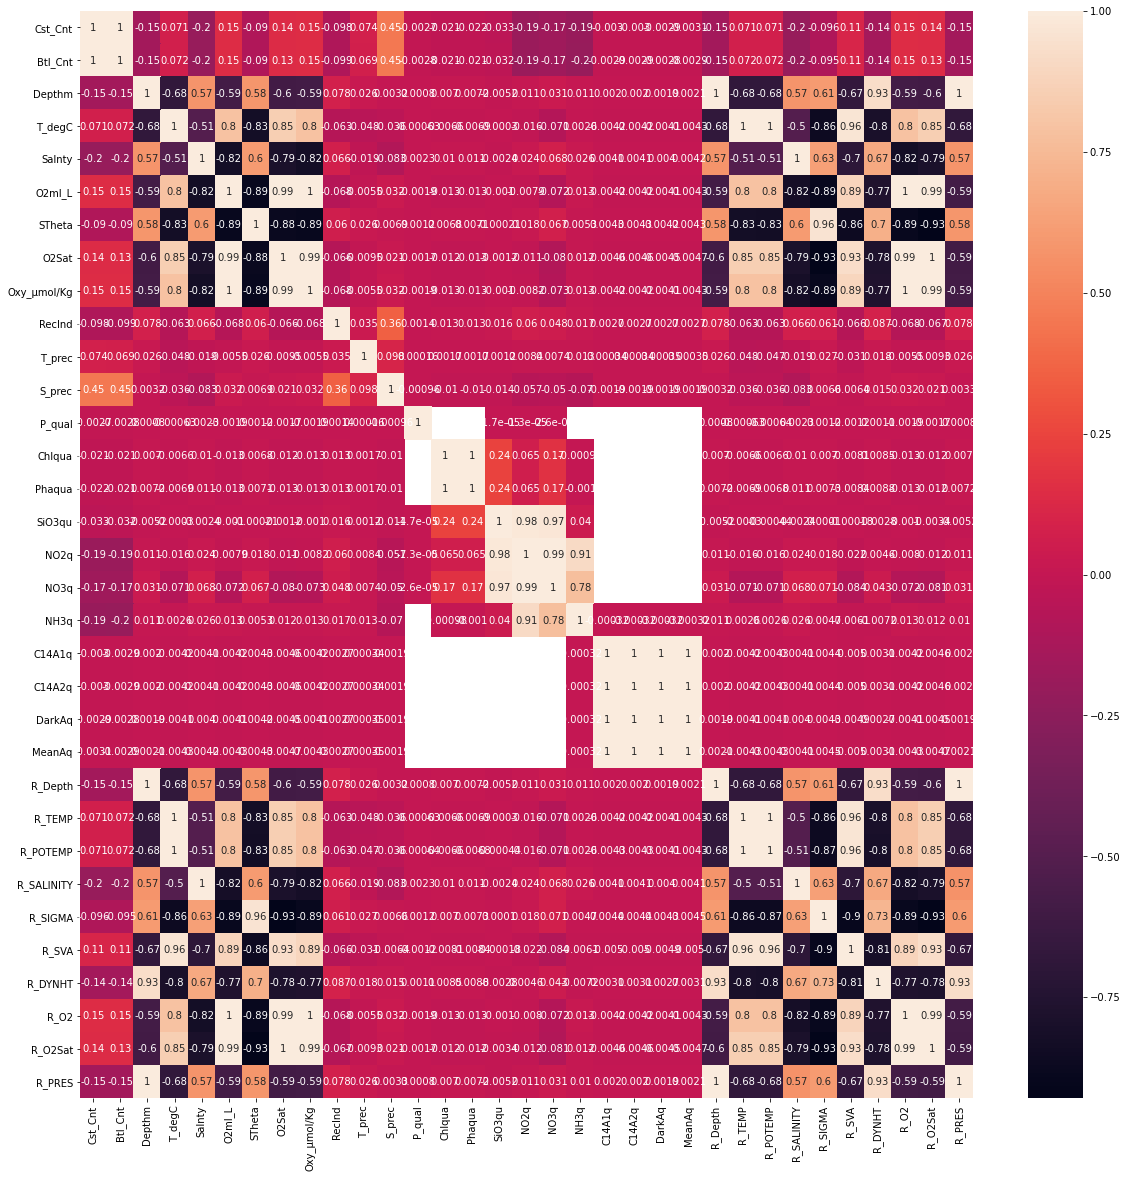

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(bottle_corrMatrix, annot=True)
plt.show()

There is a correlation coefficient of 1 between T_degC (temperature of water) and both R_TEMP (reported temperature) and R_POTEMP (reported potential temperature). So those would be excellent predictors of water temperature, but they may basically be redundant columns.

The next best predictor of water temperature is R_SVA (reported specific volume anomaly), but I don't know what that is. The correlation coefficient is 0.96. Additionally, all of the features describing oxygen saturation have strong correlations with T_degC: O2_Sat (0.85), Oxy_$\mu$mol (0.8), O2ml_L (0.8), R_O2 (0.8), R_O2Sat (0.85).

There appears to be a fairly strong negative correlation between T_degC and the density of the water. For S_theta (potential density of water) the correlation coefficient is -0.83, and for R_sigma (reported potential density of water) it's -0.86. There is a fairly strong negative correlation between T-degC and R_DYNHT (reported dynamic height), as well: -0.8. I'm not sure I understand why, though. This would make more sense to me with depth than with height. As stated, it sounds like the higher (i.e., less deep) the measurement is taken, the lower the temperature is, which seems counterintuitive.

### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity.

In [331]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

bottle_lin_df = bottle_df[['T_degC','Salnty']]
bottle_lin_df.columns = ['T_degC','Salnty']
X = np.array(bottle_lin_df['T_degC']).reshape(-1,1)
y = np.array(bottle_lin_df['Salnty']).reshape(-1,1)

In [332]:
X_train.shape

(610685, 1)

In [333]:
X_test.shape

(203562, 1)

In [334]:
from sklearn.linear_model import LinearRegression

lin_regression_model = LinearRegression().fit(X_train, y_train)

In [335]:
y_pred = lin_regression_model.predict(X_test)

In [336]:
lin_accuracy_score = lin_regression_model.score(X_test, y_test)
print(lin_accuracy_score)

0.25358292013653827


The accuracy score is low, so I don't think salinity is a good predictor of water temperature.

### 4.	Find your mean squared error and $R^2$ values. Be sure to indicate what these tell you. You can import these from sklearn.metrics.

In [337]:
#sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.1590021297695914

In [338]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.25358292013653827

The mean squared error (MSE) tells us how close the linear regression line is to the test data, meaning it tells us how close the predicted y values are to the actual y values. It measures the distances of all of the points from the regression line, squares them, and takes the average of those squares. The closer the MSE is to 0, the better, except too close to 0 can mean there is overfitting that would make the model perform badly for new data points. Based on every source I can find, there is no clear definition of what constitutes a good MSE. in this case, it's roughly 0.16, which seems OK to me.

$R^2$ is another measure of how closely the regression line fits the test data. It divides the total variance that is explained by the model by the total overall variance. If the model correctly predicted all of the test data, $R^2$ would equal 1.0 (i.e., 100%). In this case, $R^2$ is only 0.25, which is not very high.

Overall, I don't think the linear regression is a particularly good fit for the data.

### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.

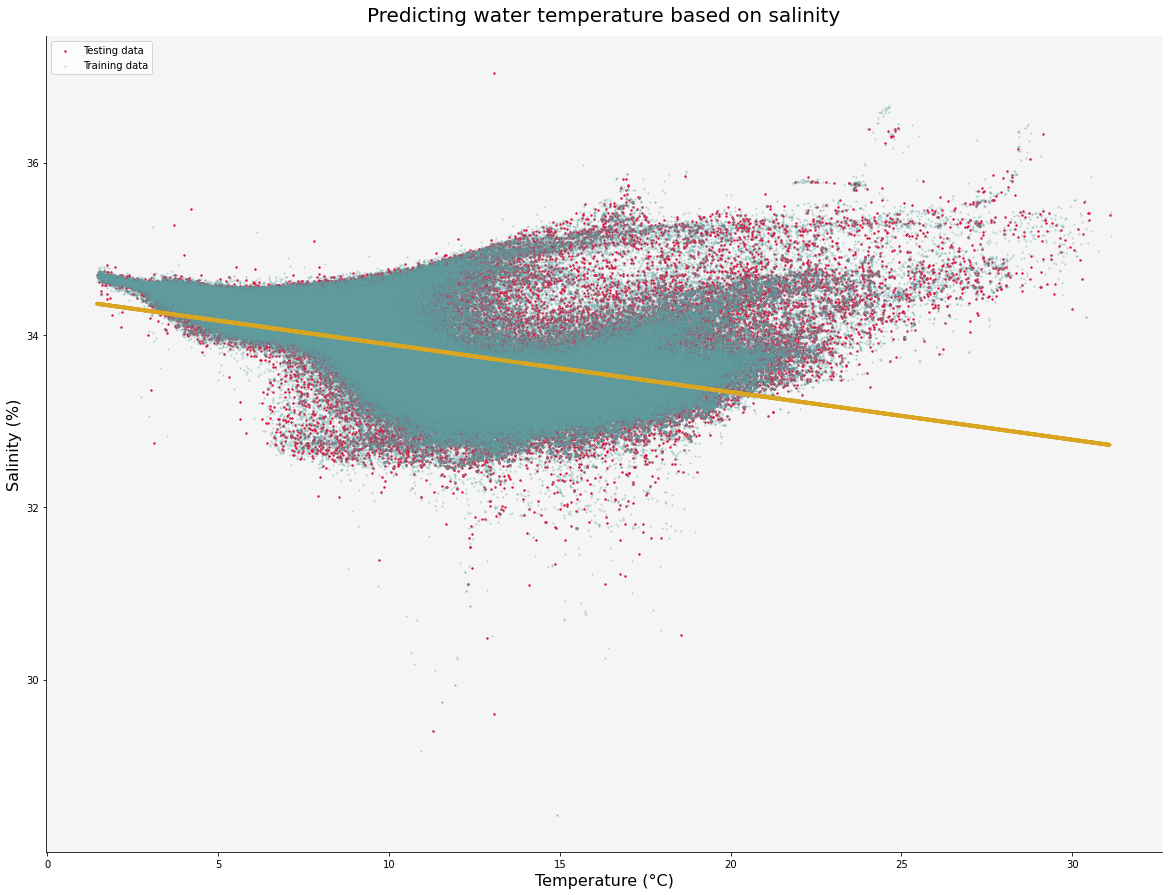

In [339]:
from matplotlib import rcParams

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
fig, ax = plt.subplots(figsize=(20,15))

ax.scatter(X_test, y_test, c='crimson', label='Testing data', s=2)
ax.scatter(X_train, y_train, c='cadetblue', label='Training data', alpha=0.25, s=2)
ax.plot(X_test, y_pred, color='goldenrod', , label='Linear regression line', linewidth=4)
#df["loan_amount"].hist(figsize=(30,12), bins=8)
ax.set_title("Predicting water temperature based on salinity", fontsize=20, pad=15)
ax.set_xlabel("Temperature (\N{DEGREE SIGN}C)", fontsize=16)
ax.set_ylabel("Salinity (%)", fontsize=16)
ax.set_facecolor("whitesmoke")
plt.legend(loc="upper left")
plt.show()

### 6.	Do some research on polynomial regression. Describe what it is and how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

I found these resources more helpful:

* https://towardsdatascience.com/polynomial-regression-the-only-introduction-youll-need-49a6fb2b86de


* https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

Polynomial regression is used for data that does not closely fit a linear regression model. It curves the regression line by raising each predictive/explanatory feature or variable to an nth degree (not necessarily all to the same degree), which results in a curved regression line.

### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and $R^2$ both apply here.

In [340]:
# https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#test_size 0.25 means 75% training data and 25% testing data. Training data set must be larger than testing data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

bottle_pol_df = bottle_df[['T_degC','Salnty']]
bottle_pol_df.columns = ['T_degC','Salnty']
X = np.array(bottle_pol_df['T_degC']).reshape(-1,1)
y = np.array(bottle_pol_df['Salnty']).reshape(-1,1)

y_train = y_train[X_train[:,0].argsort()]
X_train = X_train[X_train[:,0].argsort()]

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X_train)
#print(bottle_pol_df)

#print(X_train)

In [341]:
#y_train

In [342]:
bottle_pol_df.shape

(814247, 2)

In [343]:
X_train.shape

(610685, 1)

In [344]:
X_test.shape

(203562, 1)

In [345]:
y_train.shape

(610685, 1)

In [354]:
#I tried this code, but it didn't work ("TypeError: expected 1D vector for x"):

#poly_output = np.polyfit(X_train, y_train, 3)
#bottle_pol_model = np.poly1d(poly_output)
#fit = bottle_pol_model(X_train)

In [347]:
poly_regression_model = LinearRegression().fit(X_poly, y_train)

In [348]:
poly_accuracy_score = poly_regression_model.score(X_poly, y_train)
print(poly_accuracy_score)

0.5034409538511202


In [349]:
y_poly_pred = poly_regression_model.predict(X_poly)

In [350]:
mean_squared_error(y_train, y_poly_pred)

0.10583469126389271

In [351]:
r2_score(y_train, y_poly_pred)

0.5034409538511202

### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved.

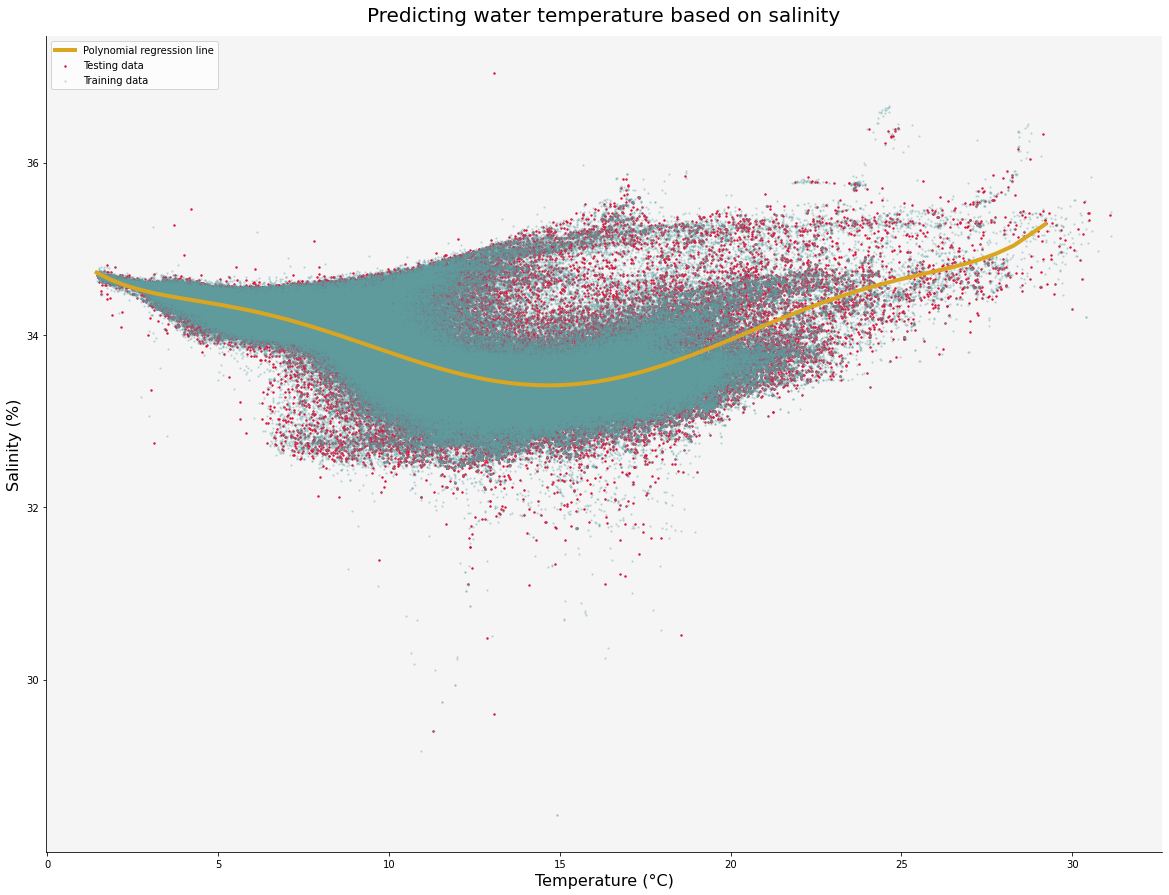

In [352]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['agg.path.chunksize'] = 1000000000

fig, ax = plt.subplots(figsize=(20,15))

ax.scatter(X_test, y_test, c='crimson', label='Testing data', s=2)
ax.scatter(X_train, y_train, c='cadetblue', label='Training data', alpha=0.25, s=2)
ax.plot(X_train[::100], y_poly_pred[::100], c='goldenrod', label='Polynomial regression line', linewidth=4)
ax.set_title("Predicting water temperature based on salinity", fontsize=20, pad=15)
ax.set_xlabel("Temperature (\N{DEGREE SIGN}C)", fontsize=16)
ax.set_ylabel("Salinity (%)", fontsize=16)
ax.set_facecolor("whitesmoke")
plt.legend(loc="upper left")
plt.show()